# Format Conversion

This notebook shows you how to convert the output of `osdatahub` into common formats for further processing. We will be
converting data from the OS API into a [GeoPandas GeoDataframe](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html)
 and a Shapely [GeometryCollection](https://shapely.readthedocs.io/en/stable/manual.html#collections).

## Table of Contents
1. [Access Data from API](#get-data)
2. [Geopandas](#geopandas)
3. [Shapely](#shapely)


## Getting the Data <a href=get-data>

We will be getting data from OS DataHub's [Features API](https://osdatahub.os.uk/docs/wfs/technicalSpecification), specifically
the OS Open Zoomstack for Local Buildings.

In [3]:
# first, we must import the correct libraries
import geopandas as gpd
from osdatahub import Extent
from osdatahub import FeaturesAPI 
import os

os.environ['PROJ_NETWORK'] = 'OFF'

In [4]:
# next, we define the API key, the DataHub product we need, and the area of interest

key = os.environ.get("OS_API_KEY") # can also swap this with your key as a string
product = "zoomstack_local_buildings"

# we are going to choose an extent in Avon, Somerset
W, S = (342730, 137700)
E, N = (347700, 141642)

crs = "EPSG:27700" # Specify the British National Grid coordinate reference system
extent = Extent.from_bbox((W, S, E, N), crs=crs)

In [10]:
# create a FeaturesAPI object containing the API key, the product, and the area of interest
local_buildings = FeaturesAPI(key, product, extent)

local_buildings_results = local_buildings.query(limit=100000)
local_buildings_results

{"crs": "EPSG:27700", "features": [{"geometry": {"coordinates": [[[347565.5499999998, 140110.0199999996], [347564.0999999996, 140105.3000000007], [347558.9000000004, 140106.9000000004], [347560.3499999996, 140111.6199999992], [347565.5499999998, 140110.0199999996]]], "type": "Polygon"}, "properties": {"OBJECTID": 8748967, "SHAPE_Area": 26.8639999914952, "SHAPE_Length": 20.7565801930049, "UUID": "9d5f2381-e92e-4180-9074-8270fd0a6131"}, "type": "Feature"}, {"geometry": {"coordinates": [[[347335.3300000001, 140191.5899999999], [347328.2199999997, 140195.5700000003], [347333.3899999997, 140204.8100000005], [347340.5, 140200.8300000001], [347335.3300000001, 140191.5899999999]]], "type": "Polygon"}, "properties": {"OBJECTID": 8748968, "SHAPE_Area": 86.2730000067018, "SHAPE_Length": 37.4723900054838, "UUID": "e26cca6a-149f-4ef2-b441-b797b98bb5b4"}, "type": "Feature"}, {"geometry": {"coordinates": [[[347397.0700000003, 140250.5], [347391.3899999997, 140241.3800000008], [347381.8899999997, 1402

## GeoPandas <a href=geopandas>

The FeaturesAPI query function returns a GeoJSON, making it simple to convert into other common data formats. GeoPandas
has a function called [from_features](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.from_features.html)
that will handle the conversion for us

In [7]:
local_buildings_gdf = gpd.GeoDataFrame.from_features(local_buildings_results['features'], crs=crs)
local_buildings_gdf

,geometry,OBJECTID,UUID,SHAPE_Length,SHAPE_Area
0,"POLYGON ((347565.550 140110.020, 347564.100 14...",8748967,9d5f2381-e92e-4180-9074-8270fd0a6131,20.756580,26.86400
1,"POLYGON ((347335.330 140191.590, 347328.220 14...",8748968,e26cca6a-149f-4ef2-b441-b797b98bb5b4,37.472390,86.27300
2,"POLYGON ((347397.070 140250.500, 347391.390 14...",8748971,02cbc1eb-bb14-442a-a697-41eb9f3d4502,43.854349,120.15200
3,"POLYGON ((347378.790 140258.080, 347375.320 14...",8748972,8944a765-a43d-4b06-8dcf-e1af60a7b50f,38.637114,83.44700
4,"POLYGON ((347406.130 140258.530, 347403.510 14...",8748973,d3f71553-e9c4-4628-9aaa-54d058f98b34,39.515811,77.59670
...,...,...,...,...,...
609,"POLYGON ((343876.480 138169.360, 343877.640 13...",8760371,0b82e087-a9fc-4268-aa35-9c9fa7fafd40,38.966373,78.24875
610,"POLYGON ((344125.870 138187.700, 344124.050 13...",8760372,f5fbf71c-2d3a-4ba4-8ef8-62f1f8f2c43e,24.714052,37.39775
611,"POLYGON ((344135.300 138202.670, 344128.940 13...",8760373,49bdb93d-6e92-410d-a620-422c49475e9f,67.930441,186.26050
612,"POLYGON ((344194.540 138319.150, 344202.420 13...",8760374,1aa44e3c-f00b-4b24-9546-d833bfdcabce,91.452135,342.11780


<AxesSubplot:>

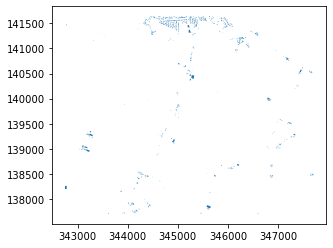

In [8]:
# plot the results
local_buildings_gdf.plot()


## Shapely <a href=shapely>

Similarly, it only takes a single line to convert the GeoJSON into a Shapely Geometry Collection. If we take the results from
the FeaturesAPI call that we implemented above, we can convert into a GeometryCollection by looping through each
geometry in the results.

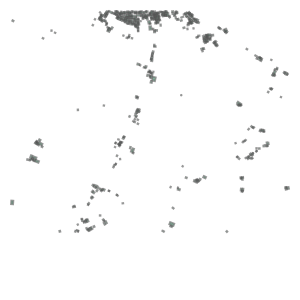

In [11]:
from shapely.geometry import shape, GeometryCollection

# NOTE: buffer(0) is a trick for fixing scenarios where polygons have overlapping coordinates
GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in local_buildings_results["features"]])


If

